In [1]:
from processing_eeg_methods.data_utils import (
    get_dataset_basic_info,
)
from processing_eeg_methods.share import datasets_basic_infos
import os


dataset_name = "braincommand"

dataset_info =get_dataset_basic_info(datasets_basic_infos, dataset_name)
data_path = r"C:\Users\rosit\Documents\workprojects\bci_complete\EEG-Classifiers-Ensemble\Datasets\braincommand_dataset"

In [3]:
import os
import pandas as pd

def count_ten_consecutive_repetitions(lst):
    repetition_counts = {}
    count = 0
    last_val = None
    
    for num in lst:
        if num == last_val:
            count += 1
        else:
            if count >= 10:
                if last_val not in repetition_counts:
                    repetition_counts[last_val] = 0
                repetition_counts[last_val] += count // 10
            count = 1
        last_val = num
    
    if count >= 10:
        if last_val not in repetition_counts:
            repetition_counts[last_val] = 0
        repetition_counts[last_val] += count // 10
    
    return repetition_counts

def get_player1_turns(file_path):
    player1_turns = []
    
    # Open the file and read the lines
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("player1_turns"):
                # Extract and parse the player1_turns list portion
                raw_data = line.split("player1_turns,")[1].strip()
                player1_turns = eval(raw_data)  # Unsafe but simple for controlled input
    
    return player1_turns

game_mode = "singleplayer"  # calibration3
subject_id_list = list(range(1, 27))

base_path = r"C:\Users\rosit\Documents\workprojects\bci_complete\BrainCommand\assets\game_saved_files\time_and_movement (re-numbered)"
file_pattern = "time_and_movement_singleplayer_sub{:02d}.txt"
data_output_path = r"C:\Users\rosit\Documents\MATLAB\2025 clean EEG BrainCommand"

results = []

for subject_id in subject_id_list:
    file_name = file_pattern.format(subject_id)
    file_path = os.path.join(base_path, file_name)
    player1_turns = get_player1_turns(file_path)
    
    subject_repetition_counts = {}
    
    for sublist in player1_turns:
        repetition_counts = count_ten_consecutive_repetitions(sublist)
        for num, count in repetition_counts.items():
            if num not in subject_repetition_counts:
                subject_repetition_counts[num] = 0
            subject_repetition_counts[num] += count
    
    for num, count in subject_repetition_counts.items():
        if count > 0:
            results.append({'Subject_ID': subject_id, 'Number': num, 'Count': count})

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save to CSV or print the DataFrame
output_path = os.path.join(data_output_path, "consecutive_repetitions_summary.csv")
df.to_csv(output_path, index=False)
df


    Subject_ID  Number  Count
0            1       2     11
1            1       0      1
2            2       2     13
3            3       3     10
4            4       3     22
5            4       1      9
6            4       2      9
7            5       3      7
8            5       1      1
9            6       2      2
10           7       3     22
11           7       0     10
12           7       1      9
13           8       2      3
14           8       3      1
15           9       0     17
16           9       2      7
17          10       3      9
18          10       0      7
19          11       2      3
20          11       3      2
21          12       1     11
22          12       0      4
23          13       3      8
24          13       2      5
25          14       2      6
26          14       0      8
27          14       1      7
28          15       3     22
29          15       2      9
30          16       0     15
31          16       2      9
32        

C:\Users\rosit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


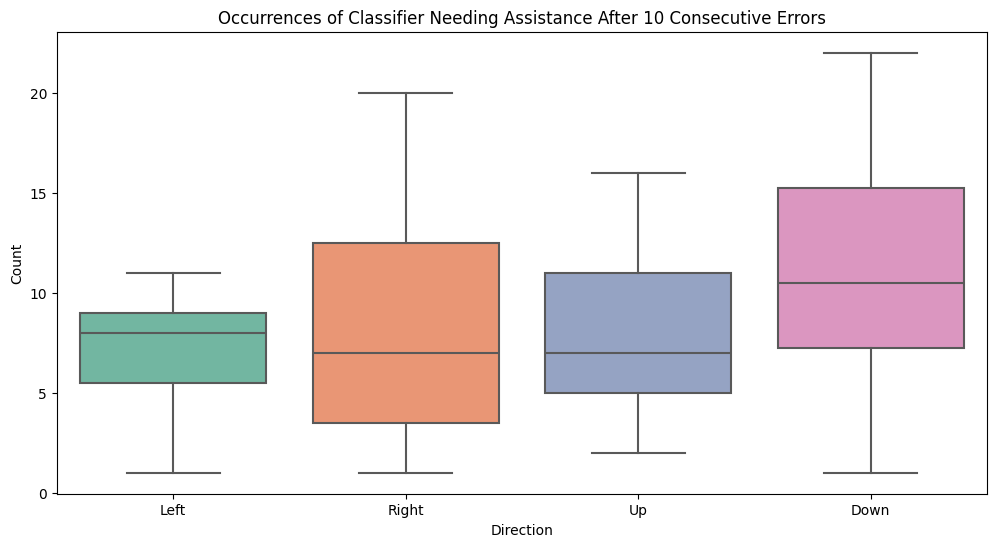

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Apply the new mapping to the DataFrame with proper capitalization
df['Direction'] = df['Number'].map({2: 'Up', 3: 'Down', 1: 'Left', 0: 'Right'})

# Set the order of the directions
order = ['Left', 'Right', 'Up', 'Down']

# Generate a boxplot with palette Set2 and the specified order
plt.figure(figsize=(12, 6))
sns.boxplot(x='Direction', y='Count', data=df, palette='Set2', order=order)

# Add title and labels
plt.title('Occurrences of Classifier Needing Assistance After 10 Consecutive Errors')
plt.xlabel('Direction')
plt.ylabel('Count')

# Display the plot
plt.show()


In [12]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

game_mode = "singleplayer"  # calibration3
subject_id_list = list(range(1, 27))

base_path = r"C:\Users\rosit\Documents\workprojects\bci_complete\BrainCommand\assets\game_saved_files\time_and_movement (re-numbered)"
file_pattern = "time_and_movement_singleplayer_sub{:02d}.txt"
data_output_path = r"C:\Users\rosit\Documents\MATLAB\2025 clean EEG BrainCommand"

results = []

def get_player1_turns(file_path):
    player1_turns = []
    
    # Open the file and read the lines
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("player1_turns"):
                raw_data = line.split("player1_turns,")[1].strip()
                player1_turns = eval(raw_data)  # Unsafe but simple for controlled input
    
    # Flatten the list
    flat_list = [item for sublist in player1_turns for item in sublist]
    return flat_list

for subject_id in subject_id_list:
    file_name = file_pattern.format(subject_id)
    file_path = os.path.join(base_path, file_name)
    player1_turns = get_player1_turns(file_path)
    count = Counter(player1_turns)  # Count the occurrences
    results.append(count)

# Creating a boxplot
count_data = {num: [] for num in range(4)}
for count in results:
    for num in range(4):
        count_data[num].append(count[num])


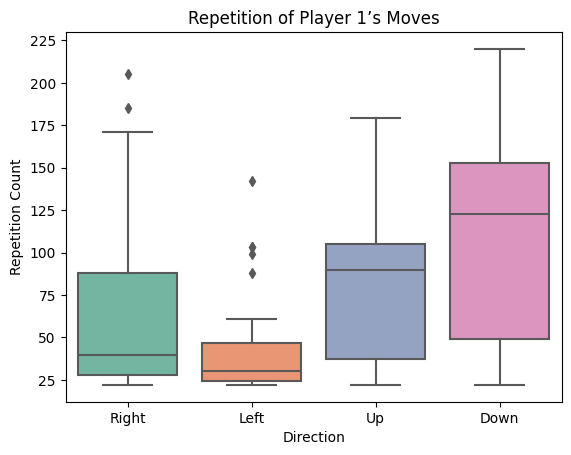

In [11]:
count_data = {num: [] for num in range(4)}
for count in results:
    for num in range(4):
        count_data[num].append(count[num])
       
# Define the mapping
direction_map = {2: 'Up', 3: 'Down', 1: 'Left', 0: 'Right'}

# Creating a boxplot with mapped directions
sns.boxplot(data=[count_data[num] for num in range(4)], palette="Set2")
plt.xticks(range(4), [direction_map[num] for num in range(4)])  # Map the numbers to directions
plt.xlabel('Direction')
plt.ylabel('Repetition Count')
plt.title('Repetition of Player 1’s Moves')
plt.show()
